# Problem Set 2

## 1. Boltzmann Equation

1. (2 points) A quantum system has N = 6.522×1023 particles in the ground state. If the temperature
is T = 315 Kelvin and the energy levels are evenly spaced with a separation of ∆E = 1 × 10−20 J,
how many particles would be expected to be in the second and third levels? Express your result in
terms of gb/ga.

In [1]:
import numpy as np
import astropy.constants as const

# Given values
N_ground = 6.522e23  # Particles in ground state
T = 315  # Temperature in Kelvin
Delta_E = 1e-20  # Energy level spacing in Joules

# exponential factor
factor = -1*Delta_E / (const.k_B.value * T)

# Particles in second and third level
N_2 = (N_ground * np.exp(factor)) # Times gb/ga
N_3 = (N_ground * np.exp(2*factor)) # Times gc/ga

print(f"N2 = {N_2:.3e} * (g2/g1)")
print(f"N3 = {N_3:.3e} * (g3/g1)")

N2 = 6.543e+22 * (g2/g1)
N3 = 6.564e+21 * (g3/g1)


2. (2 points) At what temperature would a quantum system with evenly spaced energy levels and a
separation of 1× 10−18 J, show a ratio of 1/10,000 for number of particles in adjacent levels? What
would the temperature have to be if there were just 1 in a million particles excited? Assume there
is no degeneracy in the quantum system.

In [2]:
# Given values
Delta_E = 1e-18  # Energy separation in Joules
ratios = [1/10000, 1/1e6]  # Given ratios

# Calculate temperatures
temperatures = [-1*Delta_E / (const.k_B.value * np.log(r)) for r in ratios]

print(f"T for ratio 1/10,000: {temperatures[0]:.3e} K")
print(f"T for ratio 1/1,000,000: {temperatures[1]:.3e} K")

T for ratio 1/10,000: 7.864e+03 K
T for ratio 1/1,000,000: 5.243e+03 K


3. (1 point) A gas of neutral hydrogen atoms in local thermodynamical equilibrium has 50 percent
more atoms in the energy level n = 1 than in the n = 2 state. Calculate the temperature of that
gas.

In [3]:
# Energy difference for hydrogen (1st to 2nd level)
Delta_E_eV = 13.6*3/4  # eV
Delta_E_J = Delta_E_eV * const.e.value  # Convert to Joules

# Ratio condition
n_ratio = 1/1.5
g_ratio = 8/2

# Solve for temperature
T_hydrogen = Delta_E_J / (const.k_B.value * np.log(g_ratio/n_ratio))

print(f"Temperature of gas: {T_hydrogen:.3f} K")

Temperature of gas: 66061.370 K


4. (3 points) For a gas of neutral hydrogen atoms make a graph that shows the ratios N2/N1, N3/N1,
and N4/N1 as a function of temperature T. Temperature range must be 104 − 107 K.

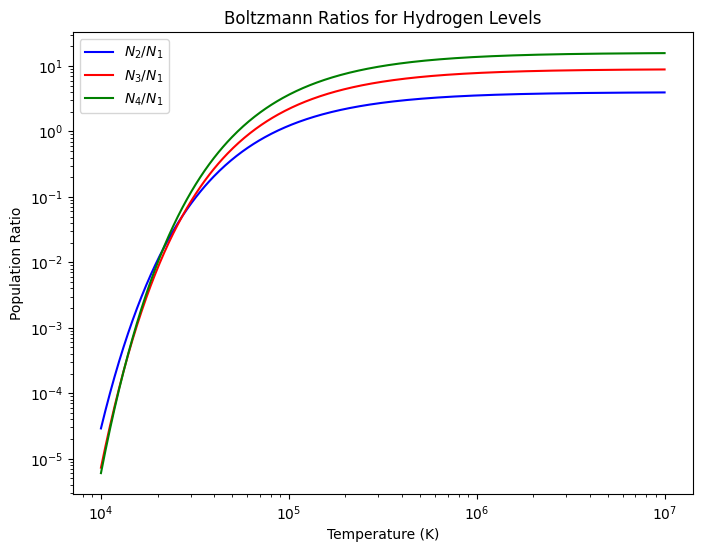

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k_B = const.k_B.value  # Boltzmann constant in J/K


# Function to calculate the ratio Nn/N1
def boltzmann_ratio(n, T):
    g_n = 2 * n**2  # Statistical weight
    g_1 = 2 * 1**2
    E_n = -13.6 / n**2  # Energy of level n in eV
    E1 = -13.6      # Energy of n=1 in eV
    return (g_n / g_1) * np.exp(-(E_n - E1) * const.e.value / (k_B * T))

# Temperature range
T_values = np.logspace(4, 7, 500)  # Logarithmic scale from 10^4 to 10^7 K

# Compute ratios
N2_N1 = boltzmann_ratio(2, T_values)
N3_N1 = boltzmann_ratio(3, T_values)
N4_N1 = boltzmann_ratio(4, T_values)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(T_values, N2_N1, label=r'$N_2/N_1$', color='b')
plt.plot(T_values, N3_N1, label=r'$N_3/N_1$', color='r')
plt.plot(T_values, N4_N1, label=r'$N_4/N_1$', color='g')

# Labels and legend
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Temperature (K)")
plt.ylabel("Population Ratio")
plt.title("Boltzmann Ratios for Hydrogen Levels")
plt.legend()

# Show plot
plt.show()


5. (1 point) At what temperature are there equal numbers of hydrogen atoms in the ground state
n= 1 and the second excited state n= 3?

In [5]:
# Solve for T when N3/N1 = 1
Delta_E_eV = 13.6*8/9  # eV
Delta_E_J = Delta_E_eV * const.e.value
T = Delta_E_J / (k_B * np.log(18/2))
print(f"T for N3/N1 = 1: {T:.3e} K")

T for N3/N1 = 1: 6.385e+04 K


## 2. Saha Equation

1. The stellar atmosphere of some white dwarf stars is dominated by pure helium. The ionisation energies of neutral helium (HeI) and singly ionized helium (HeII) are χI = 24.6 eV (energy to remove 1st electron) and χII = 54.4 eV (energy to remove 2nd electron), respectively. The partition functions are ZI = 1, ZII = 2, and ZIII = 1. Use Pe = 20 N m−2 for the electron pressure and the relation between ne and Pe for an ideal gas. 

(a) (4 points) Find the ratios NII /NI and NIII /NII for T = 5000 K, 15,000 K and 25,000 K. How do they compare?

In [6]:
# Given values
chi_I_eV, chi_II_eV = 24.6, 54.4  # Ionization energies in eV
chi_I, chi_II = chi_I_eV * const.e.value, chi_II_eV * const.e.value  # Convert to Joules
Z_I, Z_II, Z_III = 1, 2, 1  # Partition functions
Pe = 20  # Electron pressure in N/m^2
T_values = [5000, 15000, 25000]  # Temperatures in Kelvin

# Compute ratios using Saha equation
def saha_ratio(T, chi, Z_lower, Z_upper, Pe):
    factor = (2 * np.pi * const.m_e.value * k_B * T / const.h.value**2) ** (3/2)
    return (2 * Z_upper/ Z_lower) * (k_B * T / Pe ) * factor * np.exp(-chi / (k_B * T)) 

# Compute for given temperatures
for T in T_values:
    NII_NI = saha_ratio(T, chi_I, Z_I, Z_II, Pe)
    NIII_NII = saha_ratio(T, chi_II, Z_II, Z_III, Pe)
    print(f"T = {T} K: NII/NI = {NII_NI:.3e}, NIII/NII = {NIII_NII:.3e}")


T = 5000 K: NII/NI = 1.887e-18, NIII/NII = 4.331e-49
T = 15000 K: NII/NI = 9.976e-01, NIII/NII = 2.424e-11
T = 25000 K: NII/NI = 7.239e+03, NIII/NII = 1.779e-03


(b) (1 point) Derive the equation for Ntot/NII in terms of NIII/NII and NII/NI.

\begin{equation}
N_{\text{tot}} = N_I + N_{II} + N_{III}
\end{equation}
Dividing both sides by $N_{II}$:
\begin{equation}
\frac{N_{\text{tot}}}{N_{II}} =  1 + \frac{N_{III}}{N_{II}} + \frac{1}{\frac{N_{II}}{N_{I}}}
\end{equation}


(c) (1 point) Plot the ratio NII/Ntot and find the temperature of the atmosphere at the middle of the HeI partial ionisation zone, where NII/Ntot is 50 precent.

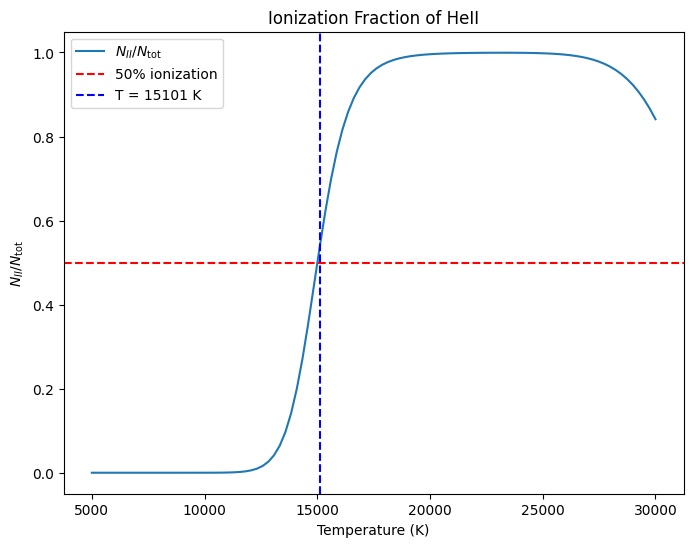

Temperature at 50% ionization: 15101 K


In [7]:
import matplotlib.pyplot as plt

# Temperature range
T_range = np.linspace(5000, 30000, 100)  # From 5000K to 30000K

# Compute NII/Ntot
NII_Ntot_values = []
for T in T_range:
    NII_NI = saha_ratio(T, chi_I, Z_I, Z_II, Pe)
    NIII_NII = saha_ratio(T, chi_II, Z_II, Z_III, Pe)
    NII_Ntot = 1 / (1 + 1/NII_NI + NIII_NII)
    NII_Ntot_values.append(NII_Ntot)

# Find T where NII/Ntot ~ 0.5
T_middle = T_range[np.argmin(np.abs(np.array(NII_Ntot_values) - 0.5))]

# Plot
plt.figure(figsize=(8,6))
plt.plot(T_range, NII_Ntot_values, label=r"$N_{II}/N_{\text{tot}}$")
plt.axhline(0.5, linestyle="--", color="red", label="50% ionization")
plt.axvline(T_middle, linestyle="--", color="blue", label=f"T = {T_middle:.0f} K")
plt.xlabel("Temperature (K)")
plt.ylabel(r"$N_{II}/N_{\text{tot}}$")
plt.legend()
plt.title("Ionization Fraction of HeII")
plt.show()

print(f"Temperature at 50% ionization: {T_middle:.0f} K")


2. We are going to investigate a hypothetical iron-like element in conditions similar to a stellar atmo-
sphere. This element, which we will call Utopium (Ut) has the following properties:
• Ionisation energies ξI = 7 eV for neutral Ut I, ξII = 16 eV for UtII, ξIII = 31 eV for Ut III, and ξIV = 51 eV for Ut IV.
• Excitation energies that increase incrementally by 1eV in each ionisation state.
• Statistical weights gj = 1 for all levels j.

Your goal is to work out which ions will have significant transitions at which temperatures, which will mean evaluating the Saha and Boltzmann equations.

(a) (2 points) work out the partition function Zi for each of the four ionisation states of Utopium. (Note that because our energy is in eV, we need to use Boltzmann’s constant in eV/K, not
J/K). Then calculate the numbers in Table 1 below for three diﬀerent temperatures. The first has been done for you as a check. All results have to be accurate to 4 significant figures.

In [8]:
import numpy as np
from scipy.constants import k as k_B, e as eV, h, m_e, pi

# Constants in appropriate units
k_B_eV = k_B / eV  # Boltzmann constant in eV/K
Pe = 100  # Electron pressure in Pa

# Given temperatures (K)
T_values = [5000, 10000, 20000]

# Given ionization energies (eV)
xi = [7, 16, 31, 51]

# Statistical weights (all g_j = 1)
g = 1

# Function to compute partition function
def partition_function(T, max_levels=4):
    return sum(g * np.exp(-E / (k_B_eV * T)) for E in range(max_levels))

# Compute and print partition functions
for i in range(4):
    print(f"Partition function for Ut_{i+1}:")
    for T in T_values:
        Z_i = partition_function(T)
        print(f"  T = {T} K: Z_{i+1} = {Z_i:.4e}")

Partition function for Ut_1:
  T = 5000 K: Z_1 = 1.1088e+00
  T = 10000 K: Z_1 = 1.4423e+00
  T = 20000 K: Z_1 = 2.0485e+00
Partition function for Ut_2:
  T = 5000 K: Z_2 = 1.1088e+00
  T = 10000 K: Z_2 = 1.4423e+00
  T = 20000 K: Z_2 = 2.0485e+00
Partition function for Ut_3:
  T = 5000 K: Z_3 = 1.1088e+00
  T = 10000 K: Z_3 = 1.4423e+00
  T = 20000 K: Z_3 = 2.0485e+00
Partition function for Ut_4:
  T = 5000 K: Z_4 = 1.1088e+00
  T = 10000 K: Z_4 = 1.4423e+00
  T = 20000 K: Z_4 = 2.0485e+00


(b) (2 points) In general, the number of electrons Ns in any energy level sof an ionisation state i is given by the equation
Ns/Ni = gs/Zi e^-(Es−E1 )/kT
where Ni is the total number of particles in all energy levels in ionisation state i, Ni = ΣsNs and Zi is the partition function. Work out the proportion of electrons in level sfor ionisation state i, Ns/Ni for Utopium. Fill in Table 2, for neutral Utopium (ionisation state 1). Which energy level always has the largest population? Why?

In [9]:
Pe = 100  # Electron pressure (Pa)
# Energy levels to consider
s_values = [1, 2, 3, 4, 5, 6, 7, 10, 15]

# Compute Ns/Ni for i=1 (neutral Utopium)
for T in T_values:
    Z1 = partition_function(T)
    print(f"\nT = {T} K:")
    for s in s_values:
        E_s = s - 1  # Incremental excitation energies (0 eV for s=1)
        N_s_Ni = g / Z1 * np.exp(-E_s / (k_B_eV * T))
        print(f"  s={s}: Ns/Ni = {N_s_Ni:.4e}")

print("\nThe ground state (s=1) always has the largest population since its energy is lowest (E1 = 0).")


T = 5000 K:
  s=1: Ns/Ni = 9.0190e-01
  s=2: Ns/Ni = 8.8553e-02
  s=3: Ns/Ni = 8.6945e-03
  s=4: Ns/Ni = 8.5367e-04
  s=5: Ns/Ni = 8.3818e-05
  s=6: Ns/Ni = 8.2296e-06
  s=7: Ns/Ni = 8.0802e-07
  s=10: Ns/Ni = 7.6482e-10
  s=15: Ns/Ni = 6.9788e-15

T = 10000 K:
  s=1: Ns/Ni = 6.9334e-01
  s=2: Ns/Ni = 2.1725e-01
  s=3: Ns/Ni = 6.8075e-02
  s=4: Ns/Ni = 2.1331e-02
  s=5: Ns/Ni = 6.6840e-03
  s=6: Ns/Ni = 2.0944e-03
  s=7: Ns/Ni = 6.5626e-04
  s=10: Ns/Ni = 2.0190e-05
  s=15: Ns/Ni = 6.0990e-08

T = 20000 K:
  s=1: Ns/Ni = 4.8816e-01
  s=2: Ns/Ni = 2.7326e-01
  s=3: Ns/Ni = 1.5296e-01
  s=4: Ns/Ni = 8.5624e-02
  s=5: Ns/Ni = 4.7930e-02
  s=6: Ns/Ni = 2.6830e-02
  s=7: Ns/Ni = 1.5019e-02
  s=10: Ns/Ni = 2.6343e-03
  s=15: Ns/Ni = 1.4478e-04

The ground state (s=1) always has the largest population since its energy is lowest (E1 = 0).


(c) (2 points) Now calculate the proportion of Ut in each ionisation state, Ni/Ntot and fill in Table 3. The simplest way to get this ratio is to set N1 = 1, evaluate the four next ionisation state populations successively from the Saha equation, and divide them by their sum = Ntot in the same scale. Use Pe = 100 Pa, where ne = Pe/kT.

In [10]:
# Compute partition functions for each ionization state and temperature
Z_values = []
for i in range(4):  # 4 ionization states
    Z_T = [partition_function(T) for T in T_values]
    Z_values.append(Z_T)

# Function to compute Saha equation ratio
def saha_ratio(T, i):
    factor = (2 * k_B * T / Pe) * ((2 * pi * m_e * k_B * T / h**2) ** 1.5)
    return factor * (Z_values[i+1][T_values.index(T)] / Z_values[i][T_values.index(T)]) * np.exp(-xi[i] / (k_B_eV * T))

# Compute Ni/Ntot for each ionization state
for T in T_values:
    N = [1]  # Start with N1 = 1

    # Compute successive ionization ratios
    for i in range(3):  # Since we have 4 states, we compute 3 ratios
        N.append(N[i] * saha_ratio(T, i))

    # Normalize by total population
    Ntot = sum(N)
    N_frac = [Ni / Ntot for Ni in N]

    # Print results
    print(f"\nT = {T} K:")
    for i in range(4):
        print(f"  N_{i+1}/N_tot = {N_frac[i]:.4e}")


T = 5000 K:
  N_1/N_tot = 9.0606e-01
  N_2/N_tot = 9.3943e-02
  N_3/N_tot = 8.2599e-12
  N_4/N_tot = 5.5176e-37

T = 10000 K:
  N_1/N_tot = 4.7791e-04
  N_2/N_tot = 9.4510e-01
  N_3/N_tot = 5.4426e-02
  N_4/N_tot = 8.6390e-11

T = 20000 K:
  N_1/N_tot = 2.7757e-10
  N_2/N_tot = 1.8030e-04
  N_3/N_tot = 6.3201e-01
  N_4/N_tot = 3.6781e-01


(d) (2 points) Finally, find the predicted strength of spectral lines from the neutral and ionised states of element Ut. Write a function Ut(T,Pe,i,s) that evaluates Ns/Ntot for any level s as a function of temperature T and electron pressure Pe. Fill in Table 4 for the ground state of Ut, s= 1, assuming Pe = 100 Pa again.

In [11]:
# Function to compute Boltzmann fraction (Ns/Ni)
def boltzmann_fraction(T, i, s):
    """Compute the fraction Ns/Ni using the Boltzmann equation."""
    Z_i = Z_values[i][T_values.index(T)]  # Partition function for state i at temperature T
    E_s = s - 1  # Excitation energy (incremental by 1 eV per level)
    return (g / Z_i) * np.exp(-E_s / (k_B_eV * T))

# Function to compute Ut(T, Pe, i, s) = Ns/Ntot
def Ut(T, Pe, i, s):
    """Computes the fraction Ns/Ntot using both Saha and Boltzmann equations."""
    # Compute ionization fractions Ni/Ntot using Saha
    N = [1]  # Start with N1 = 1
    for j in range(3):  # Compute for all ionization states
        N.append(N[j] * saha_ratio(T, j))
    Ntot = sum(N)
    Ni_Ntot = N[i] / Ntot  # Fraction of Utopium in ionization state i

    # Compute excitation fraction Ns/Ni using Boltzmann
    Ns_Ni = boltzmann_fraction(T, i, s)

    # Compute final result Ns/Ntot
    return Ns_Ni * Ni_Ntot

# Given test parameters
Pe = 100  # Electron pressure in Pa
s = 1  # Ground state
ionization_states = [0, 1, 2, 3]  # UtI, UtII, UtIII, UtIV

# Compute and print spectral line strength for ground state (s = 1)
print(f"\nTable 4: Ns/Ntot for different states (i={i}, s=1) at different temperatures\n")
print(f"{'Ion':>10} {'5000 K':>10} {'10000 K':>10} {'20000 K':>10}")
for i in ionization_states:
    strengths = [Ut(T, Pe, i, s) for T in T_values]
    print(f"{i:>10} {strengths[0]:>10.4e} {strengths[1]:>10.4e} {strengths[2]:>10.4e}")


Table 4: Ns/Ntot for different states (i=3, s=1) at different temperatures

       Ion     5000 K    10000 K    20000 K
         0 8.1717e-01 3.3135e-04 1.3550e-10
         1 8.4727e-02 6.5527e-01 8.8016e-05
         2 7.4496e-12 3.7736e-02 3.0852e-01
         3 4.9763e-37 5.9898e-11 1.7955e-01


## 3 Hydrostatic Equilibrium

Assume that the density profile in a star decreases linearly with radius: ρ(r) = ρcore(1− r/R) where ρcore is the central density and R is the stellar radius.

1. (1 point) Make a graph of the density profile with proper labels.

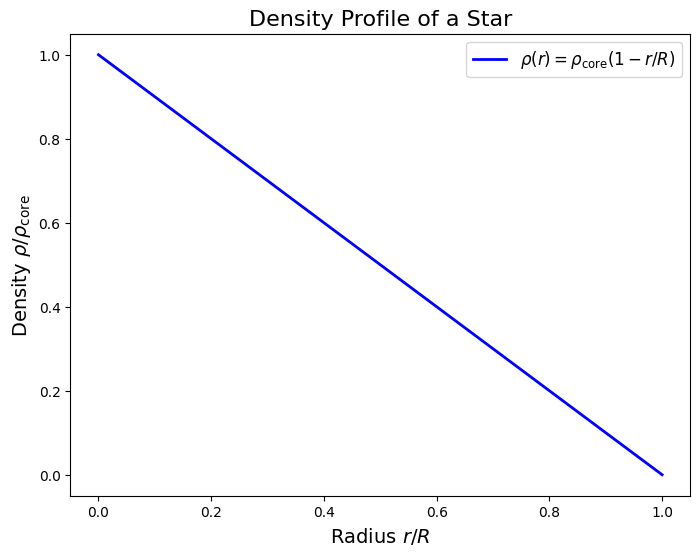

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
R = 1  # Normalized stellar radius (can be in solar radii)
rho_core = 1  # Normalized central density

# Define radius array
r = np.linspace(0, R, 100)

# Define density profile
rho = rho_core * (1 - r / R)

# Plot density profile
plt.figure(figsize=(8,6))
plt.plot(r, rho, label=r'$\rho(r) = \rho_{\text{core}}(1 - r/R)$', color='blue', linewidth=2)
plt.xlabel(r'Radius $r/R$', fontsize=14)
plt.ylabel(r'Density $\rho/\rho_{\text{core}}$', fontsize=14)
plt.title('Density Profile of a Star', fontsize=16)
plt.legend(fontsize=12)
plt.show()


2. (2 points) Compute the stellar mass M∗ and express ρcore in terms of M∗, R∗ and other constants.

In [13]:
import sympy as sp

# Define symbols
r, R, rho_core = sp.symbols('r R rho_core')
M_star = sp.Symbol('M_star')

# Define density profile
rho_r = rho_core * (1 - r / R)

# Compute mass integral
M_expr = sp.integrate(4 * sp.pi * r**2 * rho_r, (r, 0, R))

# Solve for rho_core in terms of M_star and R
rho_core_expr = sp.solve(M_expr - M_star, rho_core)[0]

#Display the result
M_expr

pi*R**3*rho_core/3

In [14]:
rho_core_expr

3*M_star/(pi*R**3)

3. (2 points) Use (i) the hydrostatic equilibrium equation and the assumptions of (ii) vanishing pressure at the surface and (iii) an ideal gas (P= ρkB T/µmP ), to express central pressure P0 and central temperature T0 in terms of M∗, R∗ and other constants, including the mean particle mass.

In [15]:
import sympy as sp

# Define symbols
r, R, rho_core = sp.symbols('r R rho_core')
M_r = sp.Symbol('M_r')

# Define density profile
rho_r = rho_core * (1 - r / R)

# Compute enclosed mass M_r
M_r_expr = sp.integrate(4 * sp.pi * r**2 * rho_r, (r, 0, r))

# Define symbol for pressure P
P = sp.Function('P')(r)

# Hydrostatic equilibrium equation: dP/dr = -G M_r rho / r^2
G = sp.Symbol('G')  # Gravitational constant

hydro_eq = sp.Eq(sp.diff(P, r), -G * M_r_expr * rho_r / r**2)

# Solve for P by integrating
P_expr = sp.integrate(-G * M_r_expr * rho_r / r**2, r)

# Define integration constant C
C = sp.Symbol('C')

# Apply boundary condition P(R) = 0
boundary_condition = P_expr.subs(r, R) + C

# Solve for C
C_value = sp.solve(boundary_condition, C)[0]

# Final pressure expression with C substituted
P_final = P_expr + C_value

# Define stellar mass M_star
M_star = sp.Symbol('M_star')

# Previously computed rho_core in terms of M_star and R
rho_core_expr = sp.solve(sp.integrate(4 * sp.pi * r**2 * rho_r, (r, 0, R)) - M_star, rho_core)[0]

# Substitute rho_core into P_0
P_0_expr = P_final.subs(r, 0).subs(rho_core, rho_core_expr).simplify()

# Display central pressure expression
P_0_expr


5*G*M_star**2/(4*pi*R**4)

In [16]:
# Define constants for ideal gas law
k_B, mu, m_p = sp.symbols('k_B mu m_p')

# Define temperature using ideal gas law: T_0 = (P_0 * mu * m_p) / (rho_core * k_B)
T_0_expr = (P_0_expr * mu * m_p) / (rho_core_expr * k_B)

# Simplify expression
T_0_simplified = sp.simplify(T_0_expr)

# Display central temperature expression
T_0_simplified

5*G*M_star*m_p*mu/(12*R*k_B)

5. (2 points) Calculate the gravitational binding energy Egr of the star (i.e. the work required to move all the material to infinity) and the total internal energy Eint assuming an ideal gas. Does the virial theorem hold in this case?

In [17]:
# Define symbols for gravitational binding energy and internal energy
E_gr, E_int = sp.symbols('E_gr E_int')

# Gravitational binding energy integral: E_gr = -∫(G * M_r * rho / r) 4π r^2 dr
E_gr_integrand = (-G * M_r_expr * rho_r / r) * 4 * sp.pi * r**2
E_gr_expr = sp.integrate(E_gr_integrand, (r, 0, R))

# Internal energy integral: E_int = ∫(3/2 * P(r)) 4π r^2 dr
E_int_integrand = 3 * P_final * 4 * sp.pi * r**2 / 2
E_int_expr = sp.integrate(E_int_integrand, (r, 0, R))

# Display gravitational binding energy and internal energy expressions
E_gr_expr

-26*pi**2*G*R**5*rho_core**2/315

In [18]:
# Display internal energy expression in fraction form
E_int_expr

13*pi**2*G*R**5*rho_core**2/315

In [19]:
# Ckecking if virial theorem holds

# Define virial theorem expression
virial_expr = 2 * E_int_expr + E_gr_expr    

# Display virial theorem expression 
virial_expr

if virial_expr == 0:
    print("Virial theorem holds.")
else:
    print("Virial theorem does not hold.")

Virial theorem holds.


4. (2 points) Estimate central temperature T0 and density ρcore of a star with R = 8.3 × 109 m and M = 5.9 × 1030 kg and compare with the corresponding values for the Sun. Are these values realistic, under- or over-estimated? Why? Explain.


In [20]:
import scipy.constants as const

# Given values
R_star = 8.3e9  # m
M_star = 5.9e30  # kg

# Constants
G = const.G  # Gravitational constant (m^3/kg/s^2)
k_B = const.Boltzmann  # Boltzmann constant (J/K)
m_p = const.m_p  # Proton mass (kg)
mu = 0.6  # Mean molecular weight (assumption)

# Compute central density
rho_core_star = (3 * M_star) / (const.pi * R_star**3)

# Compute central temperature
T_core_star = (5 * mu * m_p / (12 * k_B)) * (G * M_star / R_star)

# Sun’s values for comparison
rho_core_sun = 1.622e5  # kg/m^3
T_core_sun = 1.57e7  # K

# Print results
print(f"Central Density of the Star: {rho_core_star:.3e} kg/m^3")
print(f"Central Temperature of the Star: {T_core_star:.3e} K")
print(f"Sun's Central Density: {rho_core_sun:.3e} kg/m^3")
print(f"Sun's Central Temperature: {T_core_sun:.3e} K")

# Compare with the Sun
density_ratio = rho_core_star / rho_core_sun
temp_ratio = T_core_star / T_core_sun

print(f"Density Ratio (Star/Sun): {density_ratio:.4e}")
print(f"Temperature Ratio (Star/Sun): {temp_ratio:.4e}")

if density_ratio < 1 and temp_ratio < 1:
    print("The values are lower than the Sun's, suggesting a less dense and cooler star.")
elif density_ratio > 1 and temp_ratio > 1:
    print("The values are higher than the Sun's, suggesting a more compact and hotter star.")
else:
    print("The results indicate an unusual case requiring further analysis.")


Central Density of the Star: 9.853e+00 kg/m^3
Central Temperature of the Star: 1.437e+06 K
Sun's Central Density: 1.622e+05 kg/m^3
Sun's Central Temperature: 1.570e+07 K
Density Ratio (Star/Sun): 6.0749e-05
Temperature Ratio (Star/Sun): 9.1524e-02
The values are lower than the Sun's, suggesting a less dense and cooler star.
